# Preprocessing Electrodermal activity
## Method partly derived from "A Systematic Method for Preprocessing and Analyzing Electrodermal Activity" (Subramanian et al 2019, IEEE)

In [1]:
import numpy as np
#from biosppy import signals
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# Check for data files from all 15 subjects
path = 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\'
#Subjects S1 and S12 had sensor errors and are not included in download
pkl_dict = {'S'+str(i) : glob(path+'S'+str(i)+'\\S'+str(i)+'*.pkl', recursive=True)[0] for i in range(2,18,1) if i != 12} #Signal data

for dictionary, name in zip([pkl_dict], ['signal data']):
    print(name,':')
    for subjectID, pathstring in dictionary.items():
        print(subjectID,': ',pathstring)
    print('\n')

signal data :
S2 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S2\S2.pkl
S3 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S3\S3.pkl
S4 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S4\S4.pkl
S5 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S5\S5.pkl
S6 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S6\S6.pkl
S7 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S7\S7.pkl
S8 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S8\S8.pkl
S9 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S9\S9.pkl
S10 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S10\S10.pkl
S11 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S11\S11.pkl
S13 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S13\S13.pkl
S14 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S14\S14.pkl
S15 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S15\S15.pkl
S16 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S16\S16.pkl
S17 :  D:\Springboard\Capstone2\WESAD\Capsto

In [70]:
def check_pkl_raw(Subj_ID, pkl_filepaths, return_data=False, suppress_plots=False):
    """
    Check the integrity of raw time series data for a given subject.
    Input: 
        Subj_ID: string ('S2'-'S17')
        pkl_filepaths: dictionary of paths with Subj_ID as key
        return_data: Boolean. Indicates whether data should be returned at end of function
    Output (if requested by return_data keyword):
        dict_signal_single_subject: Dictionary containing data for the subject Subj_ID. 
    """    
    # LOAD DICTIONARY FROM PKL FILE
    dict_signal_single_subject = pd.read_pickle(pkl_filepaths[Subj_ID]) # Load pickle file
    
    if suppress_plots==False:
        print('Dictionary from .pkl file has keys:',dict_signal_single_subject.keys())
        # Check type, length of each key's value
        for key in dict_signal_single_subject.keys():
            print(key, ' is type:' , type(dict_signal_single_subject[key]), ' with length:', len(dict_signal_single_subject[key]))

        print('\n')
        print('SUBJECT #:',dict_signal_single_subject['subject'])

        # LABEL VALUES SHOW TEMPORAL STRUCTURE OF EXPERIMENT
        print('\n')
        print('LABEL unique values:',np.unique(dict_signal_single_subject['label'])) 
        # readme.pdf described label array as labels for the different experimental segments within the research design
        label_dict = {'0':'not defined/transient' ,'1':'baseline' ,'2':'stress' ,'3':'amusement' ,'4':'meditation' ,'5':'ignore' ,'6':'ignore' ,'7':'ignore' }
        print(label_dict)
        plt.plot(np.linspace(0, 6079, len(dict_signal_single_subject['label'])), dict_signal_single_subject['label'])
        plt.title(dict_signal_single_subject['subject']+' label array')
        plt.xlabel('time (s)')
        plt.ylabel('LABEL CODE')
        plt.show()

        # EXAMINE PHYSIOLOGY SIGNAL ARRAYS
        print('\n')
        print('SIGNAL KEYS:',dict_signal_single_subject['signal'].keys())
        print('chest:', type(dict_signal_single_subject['signal']['chest']), 'has keys:', dict_signal_single_subject['signal']['chest'].keys()) # Chest = RespiBAN data
        print('wrist:',type(dict_signal_single_subject['signal']['wrist']), 'has keys:', dict_signal_single_subject['signal']['wrist'].keys()) # Wrist = Empatica E4 data
        Wrist_Hz_dict = {'ACC':32, 'BVP':64, 'EDA':4, 'TEMP':4} # Frequency for Wrist device channels
        Chest_Hz_dict = {'ACC':700, 'ECG':700, 'EMG':700, 'EDA':700, 'Temp':700, 'Resp':700} # Frequency for Chest device channels
        # Plot histograms for each recording channel
        for device, device_name, Hz_dict in zip(['chest', 'wrist'], ['Chest (RespiBAN) sensor', 'Wrist (Empatica E4) sensor'], [Chest_Hz_dict, Wrist_Hz_dict]):
            print('\n',device_name)
            fig, axes = plt.subplots(1, len(dict_signal_single_subject['signal'][device].keys()), figsize=[16,2.5])
            for key, ax in zip(dict_signal_single_subject['signal'][device].keys(), axes):
                sig_array = dict_signal_single_subject['signal'][device][key]
                print(key, 'array has shape:', sig_array.shape, 'at',Hz_dict[key], 'Hz for a total of ', sig_array.shape[0]/Hz_dict[key],'seconds')
                sample = np.random.choice(sig_array.flatten(), size=10000)
                ax.hist(sample, bins=20)
                ax.set_title(key)
            fig.suptitle(device_name+'\nHistograms of 10000 randomly sampled datapoints')
            plt.tight_layout()
            plt.show()
        print('\n----------------------------------------------------------------------------\n')

    if return_data == True:
        return dict_signal_single_subject

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


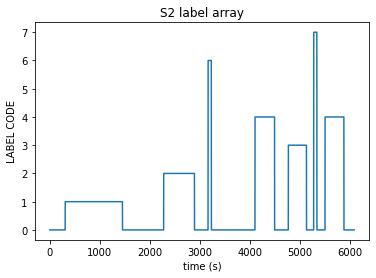



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


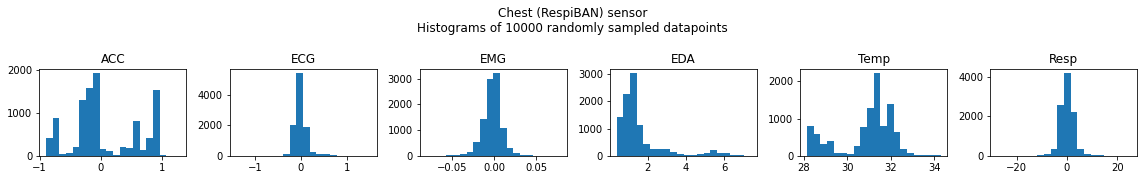


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


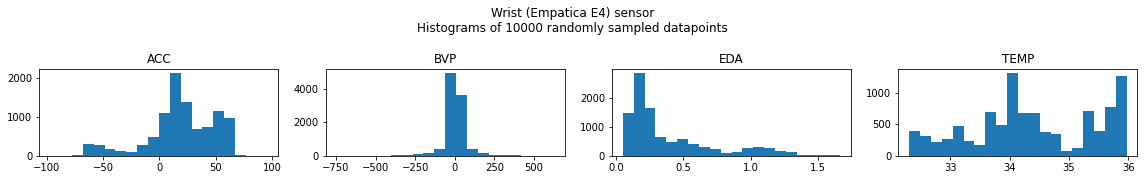


----------------------------------------------------------------------------

<class 'dict'> 3 dict_keys(['signal', 'label', 'subject'])


In [71]:
S2_data = check_pkl_raw('S2', pkl_dict, return_data=True)
print(type(S2_data), len(S2_data), S2_data.keys())

### Isolate Electrodermal activity (EDA)

In [11]:
EDA_y = S2_data['signal']['chest']['EDA']
EDA_x = np.linspace(0, len(EDA_y)/700, len(EDA_y))

print(EDA_x.shape, EDA_y.shape)

(4255300,) (4255300, 1)


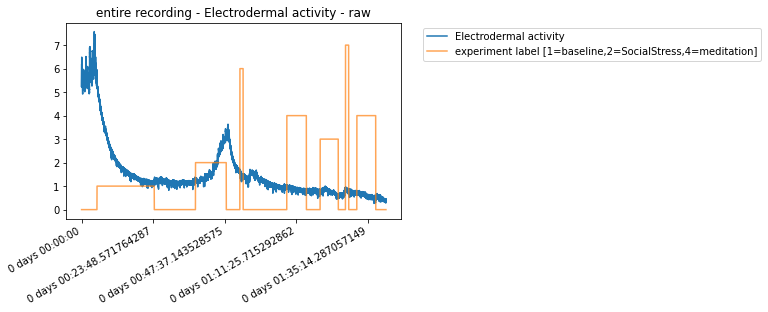

In [55]:
EDA_df = pd.Series(EDA_y.flatten(), index=pd.to_timedelta(EDA_x, unit='S'), name='Electrodermal activity')
EDA_df.plot(title='entire recording - Electrodermal activity - raw')
pd.Series(S2_data['label'].flatten(), index=pd.to_timedelta(EDA_x, unit='S'), name='experiment label [1=baseline,2=SocialStress,4=meditation]').plot(alpha=0.7)
plt.legend(bbox_to_anchor=[1.05,1]);
plt.show()

### First step: eliminate electrical noise by downsampling

<AxesSubplot:title={'center':'2 seconds of data'}>

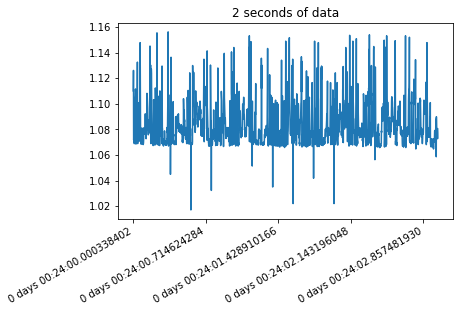

In [19]:
EDA_df.loc['00:24:00':'00:24:02'].plot(title='2 seconds of data')

### This noise is meaningless, as the baseline does not change

<AxesSubplot:title={'center':'20 seconds of data'}>

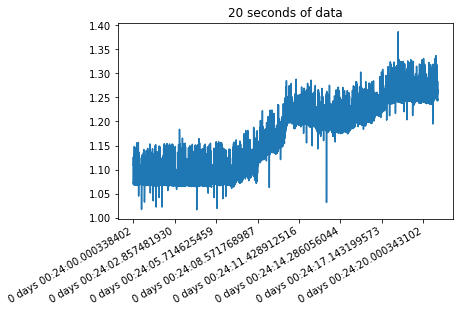

In [21]:
EDA_df.loc['00:24:00':'00:24:20'].plot(title='20 seconds of data')

### This view reveals structure we want to keep, the changing baseline. Let's downsample, keeping the median of every quarter second.

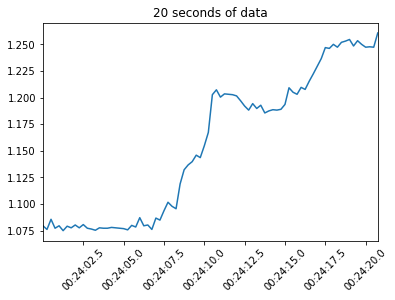

In [26]:
EDA_df.loc['00:24:00':'00:24:20'].resample('250ms').median().plot(title='20 seconds of data') #Take median of every 250ms
plt.xticks(rotation=45);

### This looks more like what we want. Structure is intact, but noise is mostly gone.

In [27]:
EDA_downsampled = EDA_df.resample('250ms').median()
print(len(EDA_df), len(EDA_downsampled))

4255300 24317


# Now take derivative (change from one time point to the next)

In [30]:
EDA_diff = EDA_downsampled.diff().dropna()

In [31]:
len(EDA_diff)

24316

In [36]:
label = S2_data['label'][::175]
print('Length experiment label array:', len(label))
x_time = np.linspace(0, len(label)/4, len(label))
print('Length and final time point (sec) of time x-values array:', len(x_time), x_time[-1])

Length experiment label array: 24316
Length and final time point (sec) of time x-values array: 24316 6079.0


##### As this label array did not drop the first value, I'm concerned that the length is the same as the EDA_diff array, but not too concerned because the event boundaries do not seem too precise with this dataset.

Text(0.5, 0, 'Time(s)')

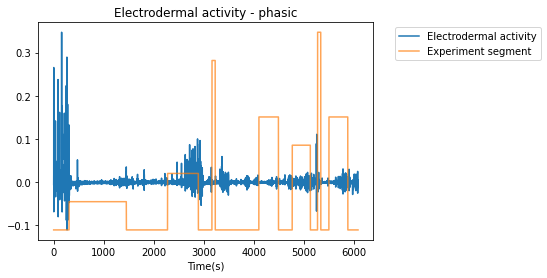

In [45]:
plt.plot(x_time, EDA_diff.values, label='Electrodermal activity')
y_max = np.max(EDA_diff.values)
y_min = np.min(EDA_diff.values)
scale = (y_max - y_min)/7
base = y_min
plt.plot(x_time, label*scale+base, alpha=0.7, label='Experiment segment')
plt.legend(bbox_to_anchor=[1.05,1])
plt.title('Electrodermal activity - phasic')
plt.xlabel('Time(s)')

# Transform to Poisson-friendly measure by finding peaks of absolute values array

In [56]:
from scipy.signal import find_peaks

In [66]:
EDA_peaks, properties = find_peaks(EDA_diff.values, prominence=0.02)
print(len(EDA_peaks), len(properties))

246 3


#### According to Subramanian et al 2020, there should be between 60 and 360 peaks per hour. Prominence for find_peaks was adjusted until obvious events were recognized and length of array were in this range.

In [67]:
EDA_peaks

array([    7,    17,    30,    45,    56,    61,   106,   143,   174,
         262,   301,   339,   342,   348,   358,   364,   404,   472,
         619,   636,   652,   664,   676,   697,   707,   795,   854,
         863,   930,   954,   961,   972,   999,  1006,  1040,  1058,
        1065,  1095,  1106,  1116,  1131,  1145,  1153,  1158,  1166,
        1215,  1248,  1268,  1339,  1359,  1366,  1900,  1904,  1923,
        5268,  5793,  5801,  5820,  6273,  6700,  7232,  7240,  8883,
        9452,  9861, 10213, 10469, 10502, 10513, 10555, 10585, 10654,
       10754, 10839, 10861, 10872, 10888, 10908, 10939, 10946, 10966,
       11006, 11024, 11036, 11047, 11061, 11081, 11131, 11169, 11178,
       11275, 11294, 11300, 11302, 11345, 11414, 11475, 11494, 11535,
       11566, 11596, 11603, 11641, 11663, 11692, 11707, 11737, 11740,
       11746, 11760, 11773, 11783, 11787, 11843, 11871, 11928, 12596,
       12599, 12931, 13281, 13286, 13396, 13417, 13442, 13445, 13454,
       13495, 13509,

Text(0.5, 0, 'Time(s)')

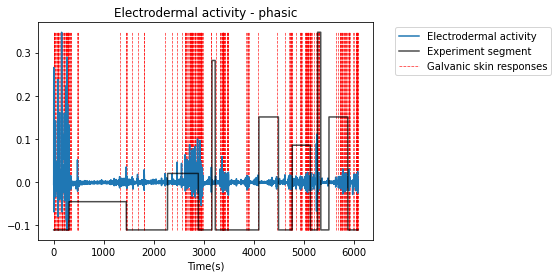

In [69]:
plt.plot(x_time, EDA_diff.values, label='Electrodermal activity')
y_max = np.max(EDA_diff.values)
y_min = np.min(EDA_diff.values)
scale = (y_max - y_min)/7
base = y_min
plt.vlines(x_time[EDA_peaks], y_min, y_max, color='r', linestyle='--', alpha=0.8, lw=0.75, label='Galvanic skin responses')
plt.plot(x_time, label*scale+base, alpha=0.7, color='k', label='Experiment segment')
plt.legend(bbox_to_anchor=[1.05,1])
plt.title('Electrodermal activity - phasic')
plt.xlabel('Time(s)')

# Now packaging this process into function form to enable batch processing of all subjects.

In [260]:
def process_electrodermal(Subj_ID, pkl_filepaths, peak_prominence=0.02, suppress_plots=False, ms_downsample=250, downsample_method='median'):
    """
    Processes electrodermal data to extract indices and times of galvanic skin responses.
    Inputs:
        Subj_ID: String representing subject ID.
        pkl_filepaths: Dictionary of filepaths for pkl files containing signal. 
        peak_prominence: Float to pass as prominence kwarg to scipy's find_peaks function.
        suppress_plots: Boolean
    Outputs:
        data_df: pandas DataFrame with columns ['time', 'phasic_EDA', 'GSR_boolean', 'label']
    """
    # Load signal data from pkl file
    S_data = check_pkl_raw(Subj_ID, pkl_filepaths, return_data=True, suppress_plots=True)
    
    EDA_y = S_data['signal']['chest']['EDA']
    EDA_x = np.linspace(0, len(EDA_y)/700, len(EDA_y))
    if suppress_plots==False: print('EDA_x.shape, EDA_y.shape',EDA_x.shape, EDA_y.shape)
    
    EDA_df = pd.Series(EDA_y.flatten(), index=pd.to_timedelta(EDA_x, unit='S'), name='Electrodermal activity')
    if suppress_plots==False:
        EDA_df.plot(title='entire recording - Electrodermal activity - raw')
        pd.Series(S_data['label'].flatten(), index=pd.to_timedelta(EDA_x, unit='S'), name='experiment label [1=baseline,2=SocialStress,4=meditation]').plot(alpha=0.7)
        plt.legend(bbox_to_anchor=[1.05,1]);
        plt.show()
        
        EDA_df.loc['00:24:00':'00:24:02'].plot(title='2 seconds of data')
        plt.show()
        
        EDA_df.loc['00:24:00':'00:24:20'].plot(title='20 seconds of data')
        plt.show()
        
        EDA_df.loc['00:24:00':'00:24:20'].resample('250ms').median().plot(title='20 seconds of data') #Take median of every 250ms
        plt.xticks(rotation=45);
        plt.show()
    
    ms_downsample=int(ms_downsample)
    downsample_slicer = int(700*(ms_downsample/1000))
    downsample_string = str(ms_downsample)+'ms'
    
    if downsample_method=='mean':
        EDA_downsampled = EDA_df.resample(downsample_string).mean()
    elif downsample_method=='median':
        EDA_downsampled = EDA_df.resample(downsample_string).median()
    if suppress_plots==False: print('len(EDA_df), len(EDA_downsampled)',len(EDA_df), len(EDA_downsampled))
    
    EDA_diff = EDA_downsampled.diff().dropna()
    
    if suppress_plots==False: print(len(EDA_diff))
    
    label = S_data['label'][::downsample_slicer]
    if suppress_plots==False: print('Length experiment label array:', len(label))
    x_time = np.linspace(0, int(len(label)/(1000/ms_downsample)), len(label))
    if suppress_plots==False: print('Length and final time point (sec) of time x-values array:', len(x_time), x_time[-1])
    if suppress_plots==False: 
        plt.plot(x_time, EDA_diff.values, lw=0.5, label='Electrodermal activity')
        y_max = np.max(EDA_diff.values)
        y_min = np.min(EDA_diff.values)
        scale = (y_max - y_min)/7
        base = y_min
        plt.plot(x_time, label*scale+base, alpha=0.7, label='Experiment segment')
        plt.legend(bbox_to_anchor=[1.05,1])
        plt.title('Electrodermal activity - phasic')
        plt.xlabel('Time(s)')
        plt.show()
    
    from scipy.signal import find_peaks
    
    EDA_peaks, properties = find_peaks(EDA_diff.values, prominence=peak_prominence)
    print('Subject',Subj_ID)
    print('With prominence set to',peak_prominence)
    print('Number of detected skin responses:', len(EDA_peaks))
    
    if suppress_plots==False: 
        plt.plot(x_time, EDA_diff.values, lw=0.5, label='Electrodermal activity')
        y_max = np.max(EDA_diff.values)
        y_min = np.min(EDA_diff.values)
        scale = (y_max - y_min)/7
        base = y_min
        plt.vlines(x_time[EDA_peaks], y_min, y_max, color='r', linestyle='--', alpha=0.8, lw=0.75, label='Galvanic skin responses')
        plt.plot(x_time, label*scale+base, alpha=0.7, color='k', label='Experiment segment')
        plt.legend(bbox_to_anchor=[1.05,1])
        plt.title('Electrodermal activity - phasic')
        plt.xlabel('Time(s)')
        plt.show()

    GSR_bool = np.zeros(shape=len(x_time))
    GSR_bool[EDA_peaks] = True
    #GSR_bool[~EDA_peaks] = False
    data_df = pd.DataFrame(dict(time=x_time, phasic_EDA=EDA_diff.values, GSR_boolean=GSR_bool, label=label), columns=['time', 'phasic_EDA', 'GSR_boolean', 'label'])
    data_df['GSR_boolean'] = data_df['GSR_boolean'].astype('bool')
    return data_df
        
    #data_df: pandas DataFrame with columns ['time', 'phasic_EDA', 'GSR_boolean', 'label']

EDA_x.shape, EDA_y.shape (4255300,) (4255300, 1)


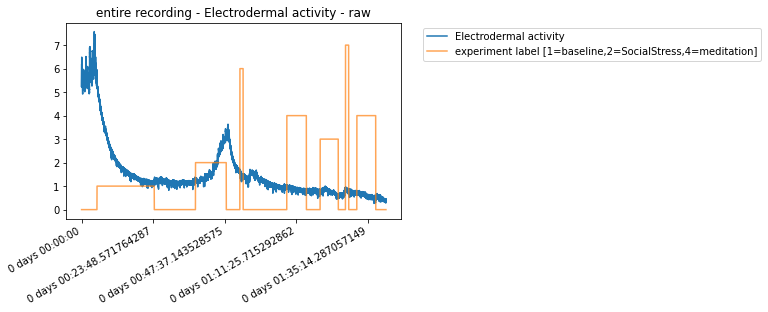

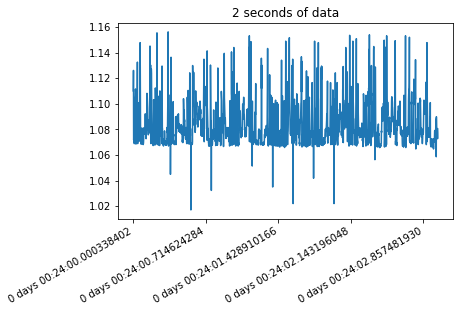

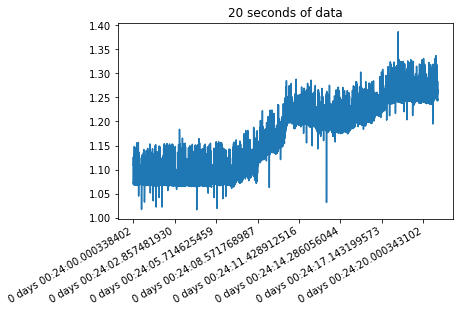

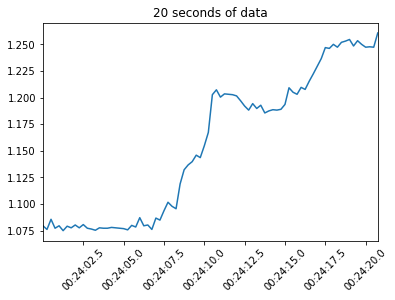

len(EDA_df), len(EDA_downsampled) 4255300 24317
24316
Length experiment label array: 24316
Length and final time point (sec) of time x-values array: 24316 6079.0


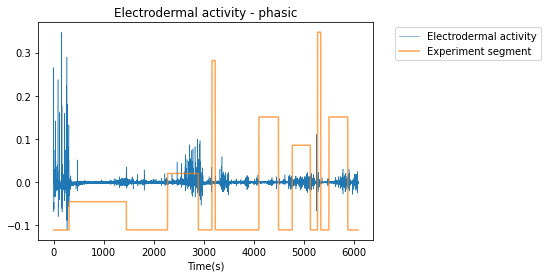

Subject S2
With prominence set to 0.02
Number of detected skin responses: 246


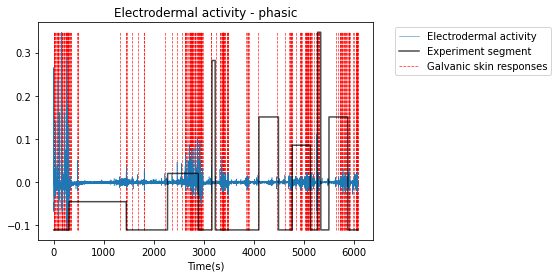

In [94]:
S2_EDA_df = process_electrodermal('S2', pkl_dict, peak_prominence=0.02, suppress_plots=False)

In [98]:
S2_EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24316 entries, 0 to 24315
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         24316 non-null  float64
 1   phasic_EDA   24316 non-null  float64
 2   GSR_boolean  24316 non-null  bool   
 3   label        24316 non-null  int32  
dtypes: bool(1), float64(2), int32(1)
memory usage: 498.8 KB


In [99]:
S2_EDA_df.head()

,time,phasic_EDA,GSR_boolean,label
0,0.000000,-0.004959,False,0
1,0.250010,-0.002670,False,0
2,0.500021,-0.001907,False,0
3,0.750031,0.016785,False,0
4,1.000041,0.080109,False,0


In [100]:
S2_EDA_df.tail()

,time,phasic_EDA,GSR_boolean,label
24311,6077.999959,0.003052,False,0
24312,6078.249969,0.000000,False,0
24313,6078.499979,-0.001526,False,0
24314,6078.749990,-0.002098,False,0
24315,6079.000000,-0.003624,False,0


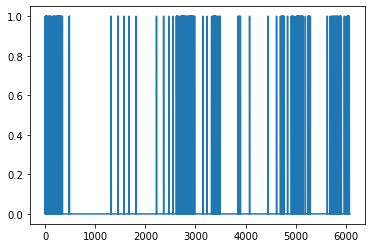

In [96]:
plt.plot(S2_EDA_df.time, S2_EDA_df.GSR_boolean)

In [97]:
S2_EDA_df.GSR_boolean.value_counts()

False    24070
True       246
Name: GSR_boolean, dtype: int64

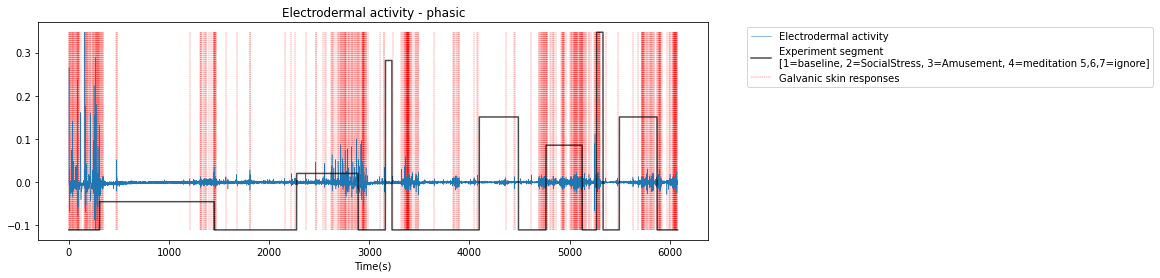

In [164]:
def plot_GSR(x_time, EDA_diff, EDA_peaks, label):
    plt.figure(figsize=[12,4])
    y_max = np.max(EDA_diff.values)
    y_min = np.min(EDA_diff.values)
    scale = (y_max - y_min)/7
    base = y_min
    plt.vlines(x_time[EDA_peaks], y_min, y_max, color='r', linestyle='--', alpha=0.8, lw=0.4, label='Galvanic skin responses')
    plt.plot(x_time, EDA_diff.values, lw=0.5, label='Electrodermal activity')
    plt.plot(x_time, label*scale+base, alpha=0.7, color='k', label='Experiment segment \n[1=baseline, 2=SocialStress, 3=Amusement, 4=meditation 5,6,7=ignore]')
    plt.legend(bbox_to_anchor=[1.05,1])
    plt.title('Electrodermal activity - phasic')
    plt.xlabel('Time(s)')
    plt.show()
    
plot_GSR(S2_EDA_df.time, S2_EDA_df.phasic_EDA, S2_EDA_df.GSR_boolean, S2_EDA_df.label)

# Using the custom functions process_electrodermal(...peak_prominence...) and plot_GSR(), I will address each subject with individually titrated peak prominence value.

## The goal of the titration is to detect almost all visually recognizable EDA events while staying between 200 and 500 total events.

Subject S2
With prominence set to 0.01
Number of detected skin responses: 282


False    5797
True      282
Name: GSR_boolean, dtype: int64

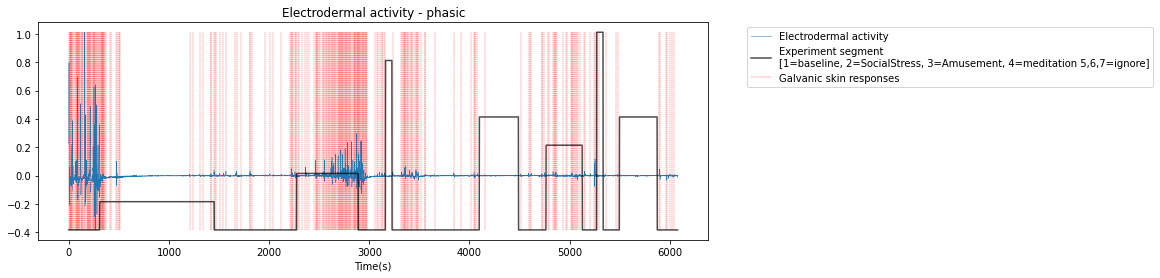

In [261]:
S2_EDA_df = process_electrodermal('S2', pkl_dict, peak_prominence=0.01, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S2_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S2_EDA_df.items()])

Subject S3
With prominence set to 0.028
Number of detected skin responses: 266


False    6227
True      266
Name: GSR_boolean, dtype: int64

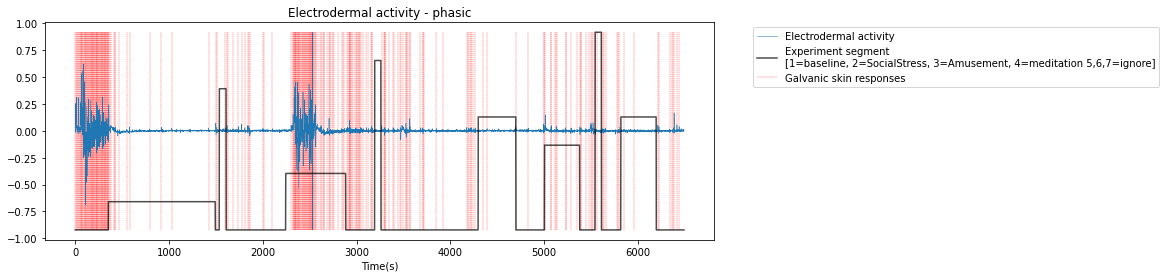

In [262]:
S3_EDA_df = process_electrodermal('S3', pkl_dict, peak_prominence=0.028, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S3_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S3_EDA_df.items()])

Subject S4
With prominence set to 0.01
Number of detected skin responses: 298


False    6125
True      298
Name: GSR_boolean, dtype: int64

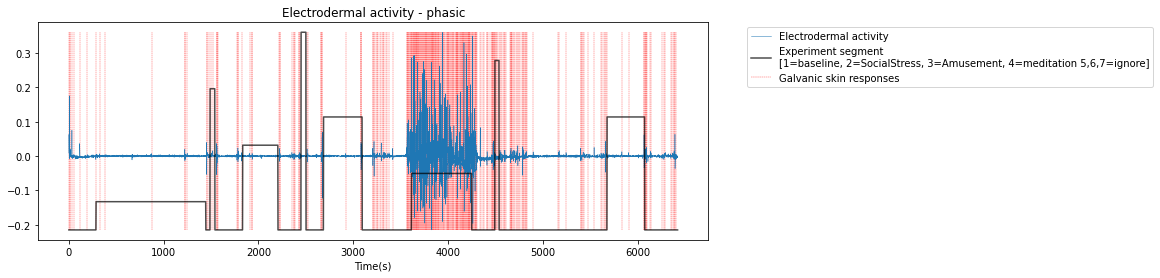

In [263]:
S4_EDA_df = process_electrodermal('S4', pkl_dict, peak_prominence=0.01, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S4_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S4_EDA_df.items()])

Subject S5
With prominence set to 0.07
Number of detected skin responses: 491


False    5767
True      491
Name: GSR_boolean, dtype: int64

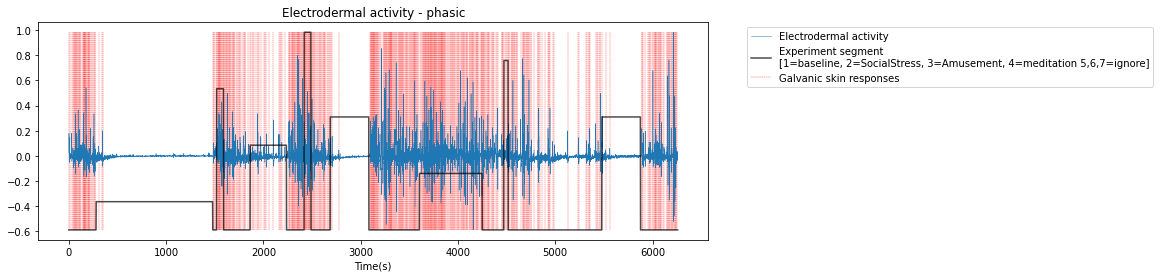

In [264]:
S5_EDA_df = process_electrodermal('S5', pkl_dict, peak_prominence=0.07, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S5_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S5_EDA_df.items()])

Subject S6
With prominence set to 0.07
Number of detected skin responses: 425


False    6646
True      425
Name: GSR_boolean, dtype: int64

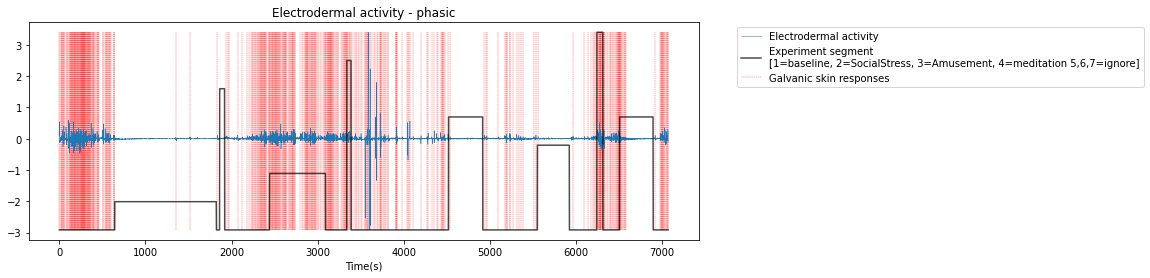

In [265]:
S6_EDA_df = process_electrodermal('S6', pkl_dict, peak_prominence=0.07, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S6_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S6_EDA_df.items()])

Subject S7
With prominence set to 0.04
Number of detected skin responses: 297


False    4941
True      297
Name: GSR_boolean, dtype: int64

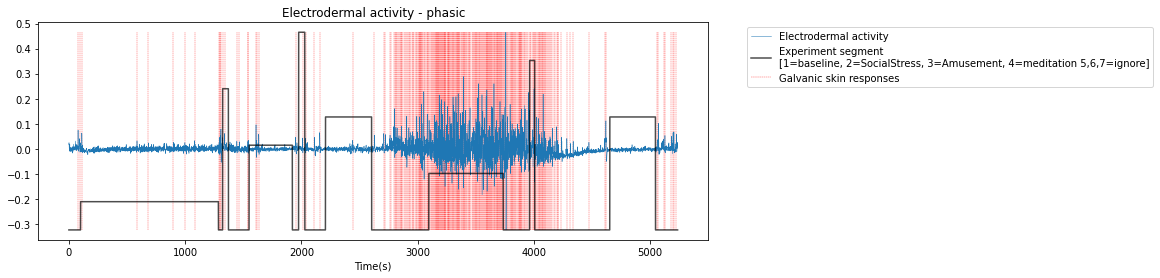

In [266]:
S7_EDA_df = process_electrodermal('S7', pkl_dict, peak_prominence=0.04, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S7_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S7_EDA_df.items()])

Subject S8
With prominence set to 0.01
Number of detected skin responses: 235


False    5231
True      235
Name: GSR_boolean, dtype: int64

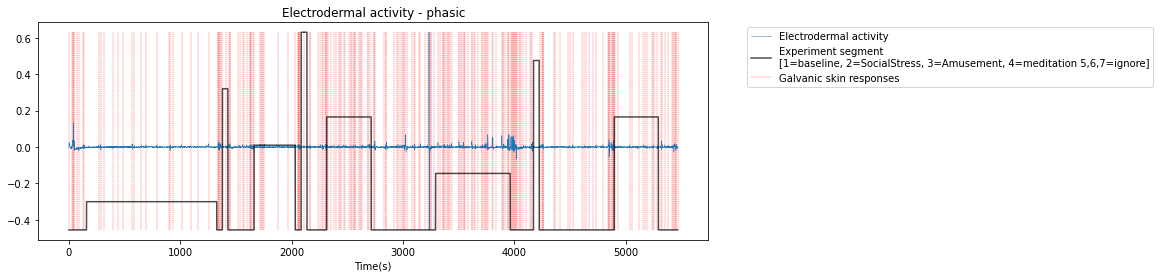

In [267]:
S8_EDA_df = process_electrodermal('S8', pkl_dict, peak_prominence=0.01, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S8_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S8_EDA_df.items()])

Subject S9
With prominence set to 0.008
Number of detected skin responses: 444


False    4779
True      444
Name: GSR_boolean, dtype: int64

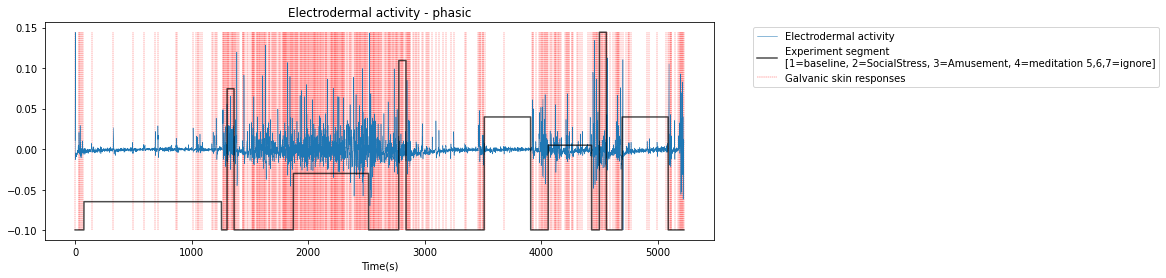

In [268]:
S9_EDA_df = process_electrodermal('S9', pkl_dict, peak_prominence=0.008, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S9_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S9_EDA_df.items()])

Subject S10
With prominence set to 0.004
Number of detected skin responses: 347


False    5149
True      347
Name: GSR_boolean, dtype: int64

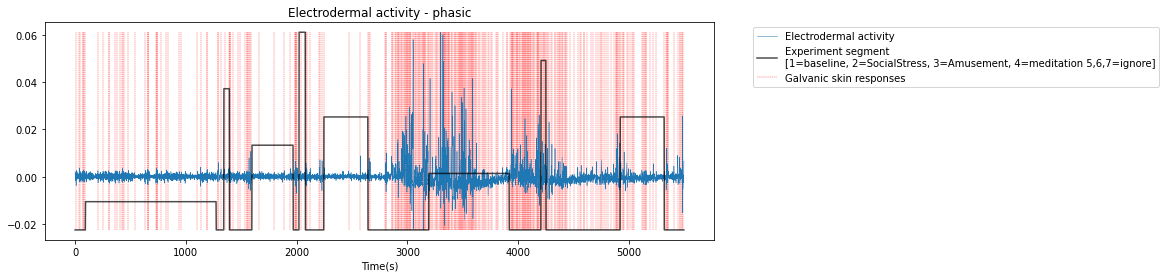

In [269]:
S10_EDA_df = process_electrodermal('S10', pkl_dict, peak_prominence=0.004, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S10_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S10_EDA_df.items()])

Subject S11
With prominence set to 0.015
Number of detected skin responses: 314


False    4919
True      314
Name: GSR_boolean, dtype: int64

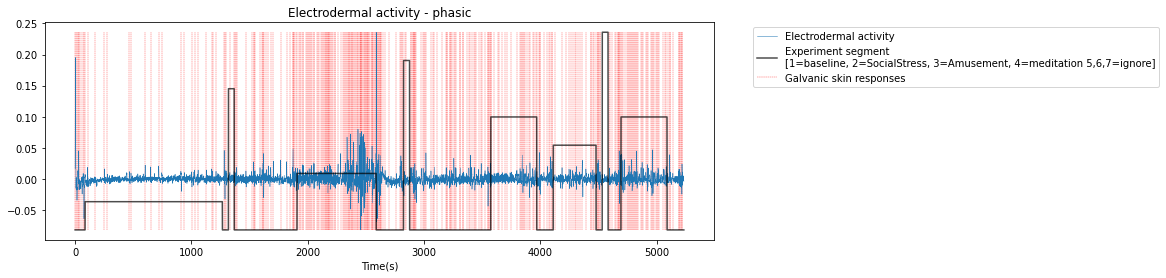

In [270]:
S11_EDA_df = process_electrodermal('S11', pkl_dict, peak_prominence=0.015, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S11_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S11_EDA_df.items()])

Subject S13
With prominence set to 0.01
Number of detected skin responses: 243


False    5294
True      243
Name: GSR_boolean, dtype: int64

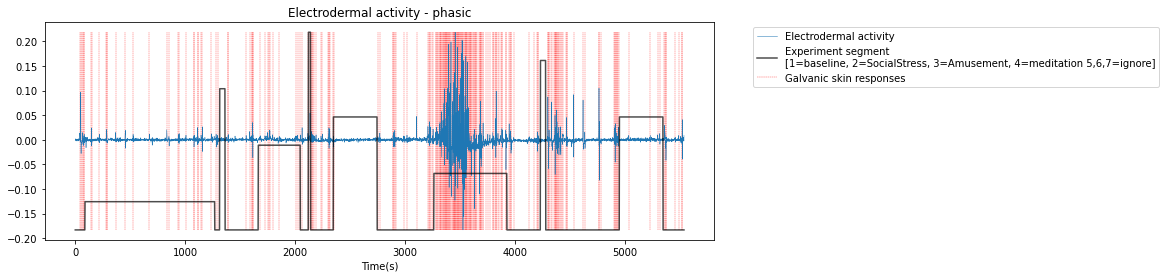

In [271]:
S13_EDA_df = process_electrodermal('S13', pkl_dict, peak_prominence=0.01, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S13_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S13_EDA_df.items()])

Subject S14
With prominence set to 0.008
Number of detected skin responses: 280


False    5268
True      280
Name: GSR_boolean, dtype: int64

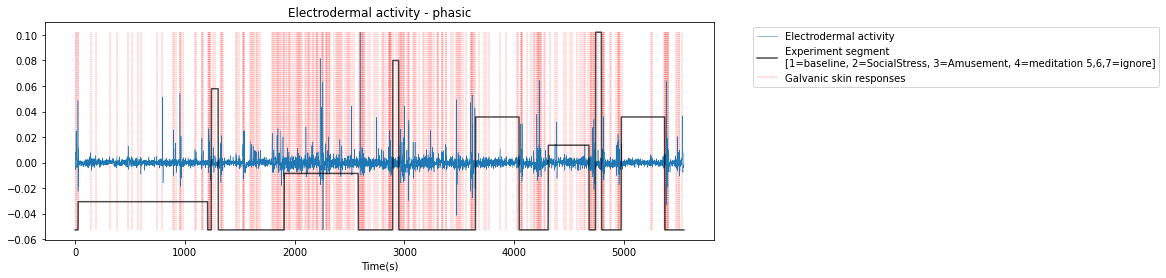

In [272]:
S14_EDA_df = process_electrodermal('S14', pkl_dict, peak_prominence=0.008, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S14_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S14_EDA_df.items()])

Subject S15
With prominence set to 0.005
Number of detected skin responses: 359


False    4893
True      359
Name: GSR_boolean, dtype: int64

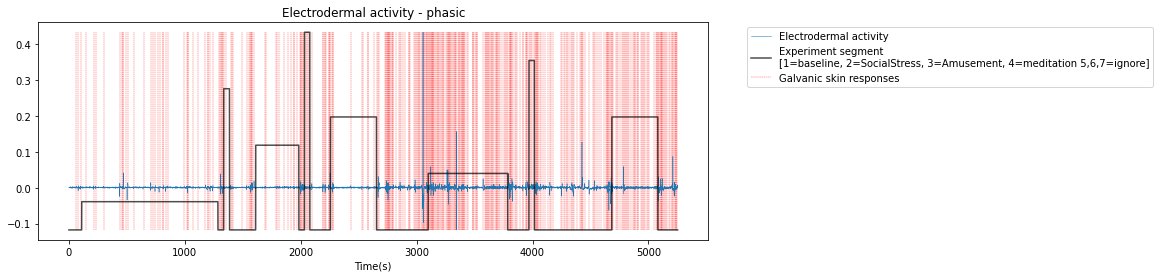

In [273]:
S15_EDA_df = process_electrodermal('S15', pkl_dict, peak_prominence=0.005, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S15_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S15_EDA_df.items()])

Subject S16
With prominence set to 0.015
Number of detected skin responses: 477


False    5154
True      477
Name: GSR_boolean, dtype: int64

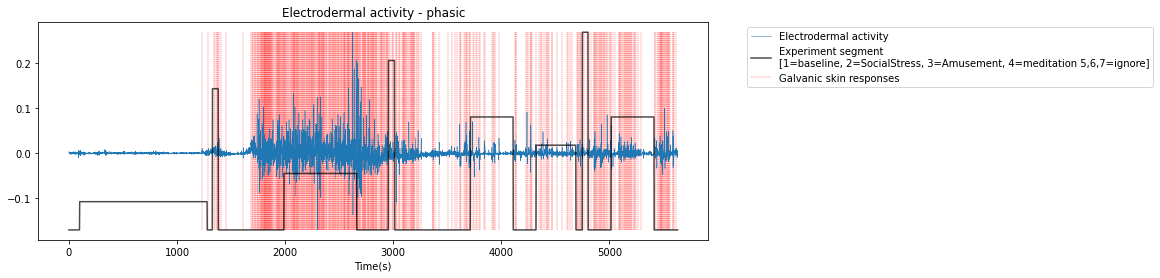

In [274]:
S16_EDA_df = process_electrodermal('S16', pkl_dict, peak_prominence=0.015, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S16_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S16_EDA_df.items()])

Subject S17
With prominence set to 0.015
Number of detected skin responses: 314


False    5606
True      314
Name: GSR_boolean, dtype: int64

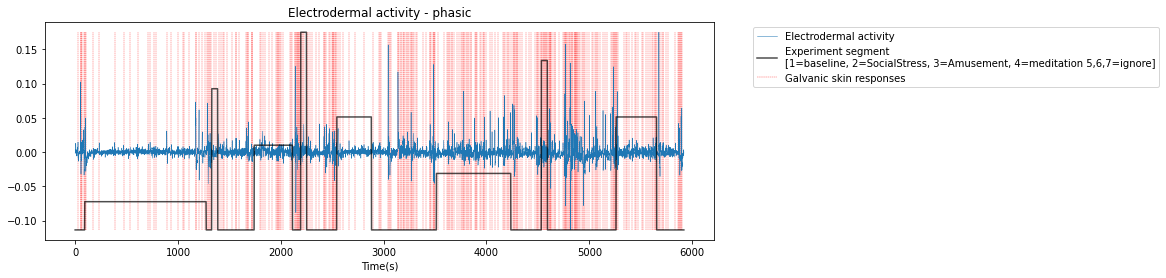

In [275]:
S17_EDA_df = process_electrodermal('S17', pkl_dict, peak_prominence=0.015, suppress_plots=True, ms_downsample=1000, downsample_method='mean')
display(S17_EDA_df.GSR_boolean.value_counts())
plot_GSR(*[series for name, series in S17_EDA_df.items()])

In [276]:
S17_EDA_df.head()

,time,phasic_EDA,GSR_boolean,label
0,0.000000,-0.001397,False,0
1,1.000169,-0.001894,False,0
2,2.000338,-0.000905,False,0
3,3.000507,0.002666,False,0
4,4.000676,-0.000318,False,0


In [277]:
S17_list = S17_EDA_df.time.values[S17_EDA_df.GSR_boolean]


In [278]:
S17_list.shape

(314,)

In [281]:
all_DFs = [S2_EDA_df, S3_EDA_df, S4_EDA_df, S5_EDA_df, S6_EDA_df,
    S7_EDA_df, S8_EDA_df, S9_EDA_df, S10_EDA_df, S11_EDA_df, 
    S13_EDA_df, S14_EDA_df, S15_EDA_df, S16_EDA_df, S17_EDA_df]
names = ['S2_EDA_df', 'S3_EDA_df', 'S4_EDA_df', 'S5_EDA_df', 'S6_EDA_df',
    'S7_EDA_df', 'S8_EDA_df', 'S9_EDA_df', 'S10_EDA_df', 'S11_EDA_df', 
    'S13_EDA_df', 'S14_EDA_df', 'S15_EDA_df', 'S16_EDA_df', 'S17_EDA_df']
for df, name in zip(all_DFs, names):
    file = '_'+name+'.csv'
    print(file)
    #df.to_csv(file)

_S2_EDA_df.csv
_S3_EDA_df.csv
_S4_EDA_df.csv
_S5_EDA_df.csv
_S6_EDA_df.csv
_S7_EDA_df.csv
_S8_EDA_df.csv
_S9_EDA_df.csv
_S10_EDA_df.csv
_S11_EDA_df.csv
_S13_EDA_df.csv
_S14_EDA_df.csv
_S15_EDA_df.csv
_S16_EDA_df.csv
_S17_EDA_df.csv
